In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus']= False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [3]:
df = pd.read_csv('./sample/상가업소정보_201912_01.csv', sep='|')
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [4]:
# 베스킨라비스와 던킨도너츠의 입점정보를 시각화하여 비교

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

In [7]:
df.isnull().sum().sort_values(ascending=False) # 칼럼별 null의 갯수

동정보          522824
건물부번지        501692
지점명          497006
호정보          488414
건물명          308072
층정보          226553
지번부번지         98756
표준산업분류명       34390
표준산업분류코드      34390
신우편번호             9
상호명               1
위도                0
상권업종소분류명          0
시군구코드             0
시도명               0
시도코드              0
상권업종대분류명          0
상권업종소분류코드         0
상권업종중분류명          0
상권업종중분류코드         0
행정동코드             0
상권업종대분류코드         0
시군구명              0
지번코드              0
행정동명              0
법정동코드             0
법정동명              0
경도                0
대지구분코드            0
대지구분명             0
지번본번지             0
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물관리번호            0
도로명주소             0
구우편번호             0
상가업소번호            0
dtype: int64

In [10]:
df_col = df.isnull().sum() < 1000 # null의 갯수가 1000개 미만인 칼럼
df_col.head()

상가업소번호        True
상호명           True
지점명          False
상권업종대분류코드     True
상권업종대분류명      True
dtype: bool

In [13]:
use_col = df_col[df_col].index
use_col

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [14]:
df[use_col]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
0,19905471,와라와라호프,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,11,서울특별시,...,서울특별시 강남구 대치동 604,116802000003,서울특별시 강남구 남부순환로,2933,1168010600106040000014378,서울특별시 강남구 남부순환로 2933,135280,6280.0,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,11,서울특별시,...,서울특별시 강남구 역삼동 696-42,116804166502,서울특별시 강남구 선릉로93길,6,1168010100106960042022041,서울특별시 강남구 선릉로93길 6,135080,6149.0,127.047883,37.505675
2,19911801,프로포즈,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,11,서울특별시,...,서울특별시 금천구 독산동 162-1,115453117003,서울특별시 금천구 가산로,34,1154510200101620001017748,서울특별시 금천구 가산로 34-6,153010,8545.0,126.899220,37.471711
3,19912201,싱싱커피&토스트,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,26,부산광역시,...,부산광역시 사상구 괘법동 578,265303139004,부산광역시 사상구 괘감로,37,2653010400105780000002037,부산광역시 사상구 괘감로 37,617726,46977.0,128.980455,35.159774
4,19932756,가락사우나내스낵,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,11,서울특별시,...,서울특별시 송파구 석촌동 256,117103123001,서울특별시 송파구 가락로,71,1171010500102560005010490,서울특별시 송파구 가락로 71,138846,5690.0,127.104071,37.500249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573675,16394290,비파티세리공덕,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,11,서울특별시,...,서울특별시 마포구 공덕동 105-67,114404139142,서울특별시 마포구 마포대로14길,4,1144010200101050067001710,서울특별시 마포구 마포대로14길 4,121801,4211.0,126.955059,37.548618
573676,16336474,앤탑PC방,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,11,서울특별시,...,서울특별시 성동구 성수동2가 289-15,112004109367,서울특별시 성동구 성수일로8길,37,1120011500102890015004255,서울특별시 성동구 성수일로8길 37,133834,4794.0,127.054615,37.545853
573677,16336218,오즈아레나PC방,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,11,서울특별시,...,서울특별시 강남구 논현동 165-8,116802102001,서울특별시 강남구 강남대로,492,1168010800101650008000001,서울특별시 강남구 강남대로 492,135825,6119.0,127.024102,37.506202
573678,16335152,파인트리네일,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,11,서울특별시,...,서울특별시 영등포구 여의도동 23,115603118002,서울특별시 영등포구 국제금융로,10,1156011000100230000000001,서울특별시 영등포구 국제금융로 10,150945,7326.0,126.924863,37.525172


In [18]:
# 사용할 칼럼만 추출
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명', '행정동명',\
           '법정동명', '도로명주소', '경도', '위도']
df = df[columns].copy()

In [20]:
df.shape

(573680, 11)

In [23]:
# 서울특별시 가게만 추출
df_seoul = df[df['시도명']=='서울특별시']
df_seoul.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249
5,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149


In [24]:
df_seoul['시군구명'].unique()

array(['강남구', '금천구', '송파구', '광진구', '강서구', '중구', '서초구', '성북구', '구로구',
       '영등포구', '서대문구', '동대문구', '노원구', '동작구', '성동구', '관악구', '강동구', '양천구',
       '종로구', '강북구', '은평구', '중랑구', '도봉구', '마포구', '용산구'], dtype=object)

In [26]:
df_seoul['시군구명'].nunique() # 유니크한 거 갯수 세어줌

25

In [27]:
df_seoul.to_csv('./seoul_open_store.csv')

In [28]:
# 서울에 있는 베스킨라빈스와 던킨도너츠 상호만 모두 가져오기

In [36]:
# 베스킨라빈스 데이터만 추출 => str.contains(정규표현식)
df_seoul[df_seoul['상호명'].str.contains('베스킨라빈스|baskinrobbins|배스킨라빈스')] # (베|배)스킨라빈스로 검색해두 됨

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
76,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,관악구,청룡동,봉천동,서울특별시 관악구 관악로 161,126.952166,37.479599
2164,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,마포구,서교동,서교동,서울특별시 마포구 와우산로 88,126.923809,37.552104
11060,베스킨라빈스은행나무점,음식,패스트푸드,아이스크림판매,서울특별시,금천구,시흥5동,시흥동,서울특별시 금천구 금하로 726-1,126.910405,37.450433
13953,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 강남대로 390,127.028565,37.497832
14201,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,광진구,광장동,광장동,서울특별시 광진구 아차산로 494,127.096667,37.541145
...,...,...,...,...,...,...,...,...,...,...,...
557464,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,은평구,진관동,진관동,서울특별시 은평구 진관2로 77,126.926589,37.634321
557822,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,서초구,방배4동,방배동,서울특별시 서초구 방배로 200,126.991649,37.491305
558006,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,동작구,대방동,대방동,서울특별시 동작구 알마타길 6,126.924959,37.509801
561929,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,송파구,문정2동,문정동,서울특별시 송파구 송파대로 111,127.124872,37.479617


In [38]:
# 던킨도너츠 데이터만 추출
df_seoul[df_seoul['상호명'].str.contains('던킨|dunkin')]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
1167,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,서대문구,신촌동,대현동,서울특별시 서대문구 이화여대길 56,126.945369,37.559263
1819,던킨도너츠테크노마트점,음식,패스트푸드,도너츠전문,서울특별시,광진구,구의3동,구의동,서울특별시 광진구 광나루로56길 85,127.095681,37.535713
2305,던킨도너츠창동하나로,음식,패스트푸드,도너츠전문,서울특별시,도봉구,창4동,창동,서울특별시 도봉구 마들로11길 20,127.050818,37.655101
2342,던킨도너츠용산민자역사2호,음식,패스트푸드,도너츠전문,서울특별시,용산구,한강로동,한강로3가,서울특별시 용산구 한강대로21나길 7,126.963223,37.527903
3007,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,송파구,잠실본동,잠실동,서울특별시 송파구 석촌호수로 118,127.090005,37.507431
...,...,...,...,...,...,...,...,...,...,...,...
535247,던킨도넛,음식,패스트푸드,도너츠전문,서울특별시,노원구,상계8동,상계동,서울특별시 노원구 동일로 1541,127.057031,37.665657
553907,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,서초구,반포3동,잠원동,서울특별시 서초구 잠원로 37-48,127.006169,37.510071
554211,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,동대문구,휘경2동,휘경동,서울특별시 동대문구 망우로 82,127.063537,37.586201
560984,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,성동구,행당1동,행당동,서울특별시 성동구 왕십리광장로 17,127.038379,37.561436


In [39]:
# 던킨도너츠와 베스킨라빈스의 데이터들을 추출

In [53]:
# 칼럼이 문자열이라면 str접근자 사용가능: 문자열칼럼.str.메소드()

df_31 = df_seoul[df_seoul['상호명'].str.contains('베스킨라빈스|baskinrobbins|배스킨라빈스|던킨|dunki')]
df_31.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
76,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,관악구,청룡동,봉천동,서울특별시 관악구 관악로 161,126.952166,37.479599
1167,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,서대문구,신촌동,대현동,서울특별시 서대문구 이화여대길 56,126.945369,37.559263
1819,던킨도너츠테크노마트점,음식,패스트푸드,도너츠전문,서울특별시,광진구,구의3동,구의동,서울특별시 광진구 광나루로56길 85,127.095681,37.535713
2164,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,마포구,서교동,서교동,서울특별시 마포구 와우산로 88,126.923809,37.552104
2305,던킨도너츠창동하나로,음식,패스트푸드,도너츠전문,서울특별시,도봉구,창4동,창동,서울특별시 도봉구 마들로11길 20,127.050818,37.655101


In [42]:
# 상호명을 단순화해서 브랜드명이라는 칼럼을 생성

In [54]:
# 상호명에 영문이 있는 경우 모두 소문자로 바꾼다

df_31['상호명'] = df_31['상호명'].str.lower()

<ipython-input-54-495c7ad7ddb2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_31['상호명'] = df_31['상호명'].str.lower()


In [55]:
df_31.loc[df_31['상호명'].str.contains('베스킨라빈스|baskinrobbins|배스킨라빈스'), '브랜드명'] = '배스킨라빈스'

C:\Users\TJ\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\TJ\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [56]:
df_31.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,브랜드명
76,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,관악구,청룡동,봉천동,서울특별시 관악구 관악로 161,126.952166,37.479599,배스킨라빈스
1167,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,서대문구,신촌동,대현동,서울특별시 서대문구 이화여대길 56,126.945369,37.559263,NaN
1819,던킨도너츠테크노마트점,음식,패스트푸드,도너츠전문,서울특별시,광진구,구의3동,구의동,서울특별시 광진구 광나루로56길 85,127.095681,37.535713,NaN
2164,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,마포구,서교동,서교동,서울특별시 마포구 와우산로 88,126.923809,37.552104,배스킨라빈스
2305,던킨도너츠창동하나로,음식,패스트푸드,도너츠전문,서울특별시,도봉구,창4동,창동,서울특별시 도봉구 마들로11길 20,127.050818,37.655101,NaN


In [57]:
df_31['브랜드명'] = df_31['브랜드명'].fillna('던킨도너츠')
df_31

<ipython-input-57-fed7374e0d9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_31['브랜드명'] = df_31['브랜드명'].fillna('던킨도너츠')


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,브랜드명
76,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,관악구,청룡동,봉천동,서울특별시 관악구 관악로 161,126.952166,37.479599,배스킨라빈스
1167,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,서대문구,신촌동,대현동,서울특별시 서대문구 이화여대길 56,126.945369,37.559263,던킨도너츠
1819,던킨도너츠테크노마트점,음식,패스트푸드,도너츠전문,서울특별시,광진구,구의3동,구의동,서울특별시 광진구 광나루로56길 85,127.095681,37.535713,던킨도너츠
2164,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,마포구,서교동,서교동,서울특별시 마포구 와우산로 88,126.923809,37.552104,배스킨라빈스
2305,던킨도너츠창동하나로,음식,패스트푸드,도너츠전문,서울특별시,도봉구,창4동,창동,서울특별시 도봉구 마들로11길 20,127.050818,37.655101,던킨도너츠
...,...,...,...,...,...,...,...,...,...,...,...,...
558006,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,동작구,대방동,대방동,서울특별시 동작구 알마타길 6,126.924959,37.509801,배스킨라빈스
560984,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,성동구,행당1동,행당동,서울특별시 성동구 왕십리광장로 17,127.038379,37.561436,던킨도너츠
561929,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,송파구,문정2동,문정동,서울특별시 송파구 송파대로 111,127.124872,37.479617,배스킨라빈스
561930,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,강동구,강일동,강일동,서울특별시 강동구 아리수로 427,127.174586,37.564954,배스킨라빈스


In [58]:
df_31['상권업종대분류명'].value_counts()

음식       654
소매         1
생활서비스      1
Name: 상권업종대분류명, dtype: int64

In [60]:
df_31[~df_31['상권업종대분류명'].isin(['소매', '생활서비스'])] # ~표시는 not을 뜻함, 소매, 생활서비스 아닌 것들만 추출

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,브랜드명
76,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,관악구,청룡동,봉천동,서울특별시 관악구 관악로 161,126.952166,37.479599,배스킨라빈스
1167,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,서대문구,신촌동,대현동,서울특별시 서대문구 이화여대길 56,126.945369,37.559263,던킨도너츠
1819,던킨도너츠테크노마트점,음식,패스트푸드,도너츠전문,서울특별시,광진구,구의3동,구의동,서울특별시 광진구 광나루로56길 85,127.095681,37.535713,던킨도너츠
2164,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,마포구,서교동,서교동,서울특별시 마포구 와우산로 88,126.923809,37.552104,배스킨라빈스
2305,던킨도너츠창동하나로,음식,패스트푸드,도너츠전문,서울특별시,도봉구,창4동,창동,서울특별시 도봉구 마들로11길 20,127.050818,37.655101,던킨도너츠
...,...,...,...,...,...,...,...,...,...,...,...,...
558006,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,동작구,대방동,대방동,서울특별시 동작구 알마타길 6,126.924959,37.509801,배스킨라빈스
560984,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,성동구,행당1동,행당동,서울특별시 성동구 왕십리광장로 17,127.038379,37.561436,던킨도너츠
561929,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,송파구,문정2동,문정동,서울특별시 송파구 송파대로 111,127.124872,37.479617,배스킨라빈스
561930,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,강동구,강일동,강일동,서울특별시 강동구 아리수로 427,127.174586,37.564954,배스킨라빈스


In [61]:
# 시각화를 통한 배스킨라비스와 던킨도너츠 비교

In [62]:
# 각각의 매장수는?

In [63]:
df_31['브랜드명'].value_counts()

배스킨라빈스    466
던킨도너츠     190
Name: 브랜드명, dtype: int64

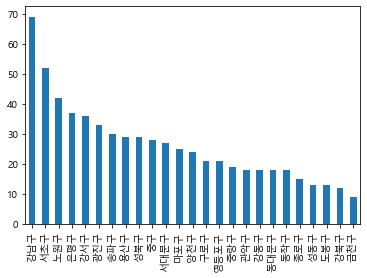

In [64]:
# 시군구명별로 각각 몇 개의 매장이 있는지 bar chart로 표현
df_31['시군구명'].value_counts().plot(kind='bar')

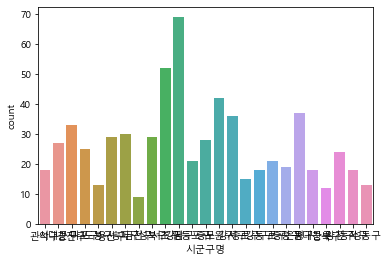

In [66]:
sns.countplot(data=df_31, x='시군구명')

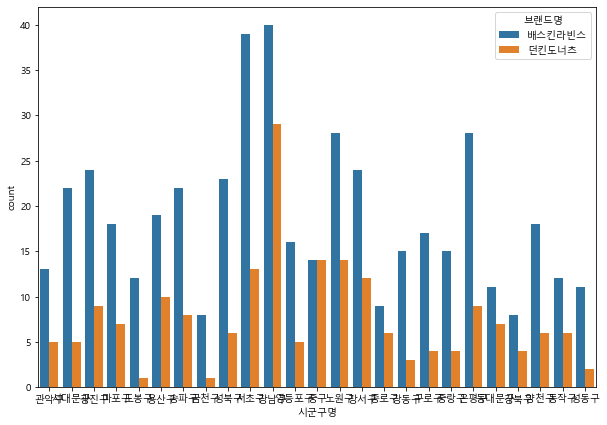

In [68]:
plt.figure(figsize=(10,7))
sns.countplot(data=df_31, x='시군구명', hue='브랜드명')

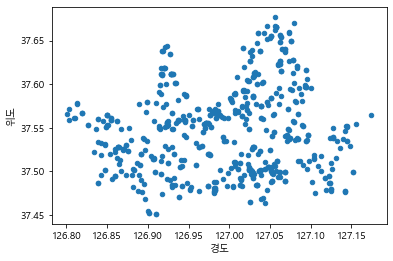

In [71]:
# 분포를 표시 - scatterplot
df_31[['위도', '경도']].plot(kind='scatter', x='경도', y='위도')

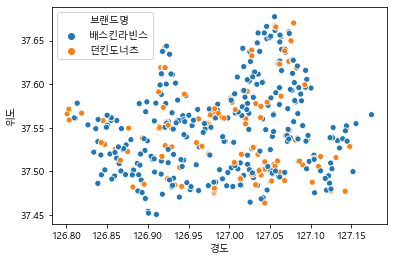

In [70]:
sns.scatterplot(data=df_31, x='경도', y='위도', hue='브랜드명')

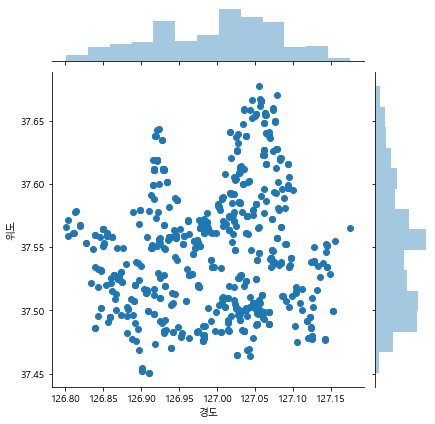

In [74]:
sns.jointplot(data=df_31, x='경도', y='위도')

In [75]:
# folium을 통해 지도에 표시
import folium

In [77]:
lat=df_31['위도'].mean()
long=df_31['경도'].mean()
folium.Map([lat, long])

In [78]:
m = folium.Map([lat, long])

In [79]:
folium.Marker([37.5, 127], tooltip='던킨도너츠').add_to(m)
m

In [80]:
m.save('./index.html')

In [81]:
m = folium.Map([lat, long], zoom_start=12)

for i in df_31.index:
    sub_lat = df_31.loc[i, '위도']
    sub_long = df_31.loc[i, '경도']
    title = df_31.loc[i, '상호명']
    folium.Marker([sub_lat, sub_long], tooltip=title).add_to(m)
m

In [90]:

m = folium.Map([lat, long], zoom_start=12)

for i in df_31.index:
    sub_lat = df_31.loc[i, '위도']
    sub_long = df_31.loc[i, '경도']
    title = df_31.loc[i, '상호명']
    
    icon_color='blue'
    if df_31.loc[i, '브랜드명']=='던킨도너츠':
        icon_color='red'
    
    folium.Marker([sub_lat, sub_long], icon=folium.Icon(color=icon_color), tooltip=title).add_to(m)
m

In [92]:
from folium.plugins import MarkerCluster

m = folium.Map([lat, long], zoom_start=12)
marker_cluster = MarkerCluster().add_to(m) #추가

for i in df_31.index:
    sub_lat = df_31.loc[i, '위도']
    sub_long = df_31.loc[i, '경도']
    title = df_31.loc[i, '상호명']
    
    icon_color='blue'
    if df_31.loc[i, '브랜드명']=='던킨도너츠':
        icon_color='red'
    
    folium.Marker([sub_lat, sub_long], icon=folium.Icon(color=icon_color), tooltip=title).add_to(marker_cluster)
m

In [87]:
# 파리바게뜨와 뚜레쥬르

In [93]:
df.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711
3,싱싱커피&토스트,음식,패스트푸드,토스트전문,부산광역시,사상구,괘법동,괘법동,부산광역시 사상구 괘감로 37,128.980455,35.159774
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249


In [126]:
df_bread = df_seoul[df_seoul['상호명'].str.contains('뚜레(주|쥬)르|파리(바게뜨|크라상|바게트)')]
df_bread.head()

C:\Users\TJ\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
2935,뚜레쥬르,음식,제과제빵떡케익,제과점,서울특별시,노원구,공릉2동,공릉동,서울특별시 노원구 공릉로 213,127.077295,37.628289
13843,뚜레쥬르,음식,제과제빵떡케익,제과점,서울특별시,서초구,서초4동,서초동,서울특별시 서초구 서초대로 411,127.025904,37.498098
14031,파리바게뜨길동사거리점,음식,제과제빵떡케익,제과점,서울특별시,강동구,성내3동,성내동,서울특별시 강동구 천호대로 1128,127.136501,37.534154
14229,파리바게뜨상계제일점,음식,제과제빵떡케익,제과점,서울특별시,노원구,상계10동,상계동,서울특별시 노원구 노원로 540,127.059227,37.661367
14246,뚜레쥬르중계브라운,음식,제과제빵떡케익,제과점,서울특별시,노원구,중계2.3동,중계동,서울특별시 노원구 동일로203가길 29,127.064245,37.639918


In [128]:
df_bread['상권업종대분류명'].value_counts()

음식       823
학문/교육      2
Name: 상권업종대분류명, dtype: int64

In [130]:
df_bread[df_bread['상권업종대분류명']=='학문/교육']

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
354693,파리바게뜨교육소,학문/교육,학원-자격/국가고시,학원-제과기술,서울특별시,영등포구,영등포동,영등포동8가,서울특별시 영등포구 영중로 159,126.905405,37.530553
406627,뚜레쥬르,학문/교육,학원-자격/국가고시,학원-제과기술,서울특별시,금천구,가산동,가산동,서울특별시 금천구 가산디지털1로 128,126.883684,37.477224


In [133]:
df_bread = df_bread[~df_bread['상권업종대분류명'].str.contains('학문/교육')].copy()

In [136]:
df_bread['상호명'].unique()

array(['뚜레쥬르', '파리바게뜨길동사거리점', '파리바게뜨상계제일점', '뚜레쥬르중계브라운', '파리바게뜨-판매옥수점',
       '파리바게뜨당고개점', '파리바게뜨목동오거리점', '뚜레쥬르신당역점', '파리바게뜨', '파리바게뜨서강신수점',
       '파리크라상', '파리바게뜨수유중앙점', '파리바게뜨가락중앙점', '파리바게뜨종로구기',
       '뚜레쥬르왕십리민자역사점왕십리민자역사점', '파리크라상교대역점', '뚜레쥬르도선사거리점', '여의도2호파리크라상',
       '목동파리크라상', '뚜레쥬르개봉역점', '파리바게뜨외대점', '파리크라상파스쿠찌홍', '파리크라상파스쿠찌압',
       'CJ뚜레쥬르', '신목파리바게뜨', '방주산업뚜레쥬르광화문경희궁의', '파리크라상파스쿠찌서', '파리크라상파스쿠찌도',
       '강동경희파리바게뜨', '파리크라상이대점', '파리크라상파스쿠찌압구정역2호', '뚜레쥬르송천센트레빌점',
       '파리크라상잠바주스디큐브', '파리크라상잠바주스대치역', '파리바게트', '상계뚜레쥬르', '뚜레쥬르대림3동점',
       '뚜레쥬르목4동점', '카페약수파리바게트', '파리바게뜨가좌역점', '파리바게뜨영등포구청점', '뚜레쥬르독산지식센터점',
       '파리바게뜨수락리버시티', '파리바게뜨방학중앙점', '파리바게뜨중계2호점', '뚜레쥬르방화역점', '파리바게뜨중앙대점',
       '뚜레쥬르레이크펠리스점', '파리바게뜨장안현대점', '뚜레쥬르우이점', '파리바게뜨성북점', '뚜레쥬르양천푸른점',
       '파리바게뜨마장대로점', '파리바게뜨문정역점', '뚜레쥬르엔시티보라매', '파리바게뜨종로시그니처점',
       '파리바게뜨상계보람점', '파리바게뜨성동세무서점', '파리바게뜨여의경도점', '파리바게뜨구로제일점',
       '뚜레쥬르창동SM마트', '파리바게뜨카페대학로점', '파리바게뜨대림역점', '파리바게뜨월계미성', '파리크라상서래점',
       '파리바게뜨금천한양점', '씨

In [137]:
df_bread = df_bread[~df_bread['상호명'].str.contains('파스쿠치|잠바주스')].copy() # 잠바주스 파스쿠치 제외

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
2935,뚜레쥬르,음식,제과제빵떡케익,제과점,서울특별시,노원구,공릉2동,공릉동,서울특별시 노원구 공릉로 213,127.077295,37.628289
13843,뚜레쥬르,음식,제과제빵떡케익,제과점,서울특별시,서초구,서초4동,서초동,서울특별시 서초구 서초대로 411,127.025904,37.498098
14031,파리바게뜨길동사거리점,음식,제과제빵떡케익,제과점,서울특별시,강동구,성내3동,성내동,서울특별시 강동구 천호대로 1128,127.136501,37.534154
14229,파리바게뜨상계제일점,음식,제과제빵떡케익,제과점,서울특별시,노원구,상계10동,상계동,서울특별시 노원구 노원로 540,127.059227,37.661367
14246,뚜레쥬르중계브라운,음식,제과제빵떡케익,제과점,서울특별시,노원구,중계2.3동,중계동,서울특별시 노원구 동일로203가길 29,127.064245,37.639918
...,...,...,...,...,...,...,...,...,...,...,...
559820,파리바게뜨,음식,제과제빵떡케익,제과점,서울특별시,송파구,위례동,장지동,서울특별시 송파구 위례광장로 136,127.142223,37.477113
561538,파리바게뜨,음식,제과제빵떡케익,제과점,서울특별시,강서구,방화1동,마곡동,서울특별시 강서구 마곡서1로 139-13,126.818015,37.569257
561810,파리바게뜨,음식,제과제빵떡케익,제과점,서울특별시,관악구,청룡동,봉천동,서울특별시 관악구 남부순환로218길 1,126.950620,37.480955
569327,파리바게뜨,음식,제과제빵떡케익,제과점,서울특별시,마포구,상암동,상암동,서울특별시 마포구 성암로 267,126.890966,37.581110


In [140]:
df_bread.loc[df_bread['상호명'].str.contains('파리바게|파리크라'), '브랜드명'] = '파리바게뜨'

In [143]:
df_bread.tail(50)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,브랜드명
506927,파리바게뜨창동제일,음식,제과제빵떡케익,제과점,서울특별시,도봉구,창5동,창동,서울특별시 도봉구 해등로 145,127.040149,37.656294,파리바게뜨
506956,파리바게뜨양평비즈타워,음식,제과제빵떡케익,제과점,서울특별시,영등포구,양평1동,양평동2가,서울특별시 영등포구 영등포로 33,126.885193,37.523264,파리바게뜨
507149,파리바게뜨논현,음식,제과제빵떡케익,제과점,서울특별시,강남구,논현2동,논현동,서울특별시 강남구 도산대로50길 21,127.037666,37.520964,파리바게뜨
507395,파리바게뜨,음식,제과제빵떡케익,제과점,서울특별시,강북구,미아동,미아동,서울특별시 강북구 도봉로 237,127.024459,37.629828,파리바게뜨
507620,파리바게뜨,음식,제과제빵떡케익,제과점,서울특별시,노원구,하계2동,하계동,서울특별시 노원구 섬밭로 241,127.064024,37.637636,파리바게뜨
507870,파리바게뜨카페,음식,제과제빵떡케익,제과점,서울특별시,서대문구,홍은1동,홍은동,서울특별시 서대문구 홍지문길 1-38,126.954554,37.596936,파리바게뜨
507909,파리바게뜨,음식,제과제빵떡케익,제과점,서울특별시,노원구,월계3동,월계동,서울특별시 노원구 마들로1가길 121,127.067517,37.617445,파리바게뜨
508284,파리바게트도곡렉슬,음식,제과제빵떡케익,제과점,서울특별시,강남구,도곡2동,도곡동,서울특별시 강남구 선릉로 225,127.052707,37.495361,파리바게뜨
508326,파리바게뜨방학선덕,음식,제과제빵떡케익,제과점,서울특별시,도봉구,방학3동,방학동,서울특별시 도봉구 시루봉로 67,127.027048,37.658061,파리바게뜨
508327,파리바게뜨,음식,제과제빵떡케익,제과점,서울특별시,동작구,노량진1동,본동,서울특별시 동작구 노량진로32길 72-6,126.956442,37.511111,파리바게뜨


In [144]:
df_bread['브랜드명'] = df_bread['브랜드명'].fillna('뚜레쥬르')

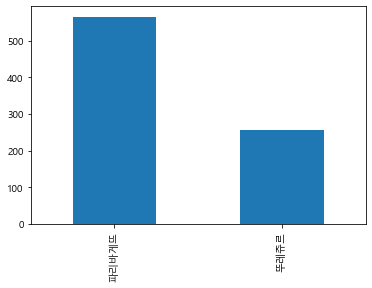

In [146]:
df_bread['브랜드명'].value_counts().plot(kind='bar')

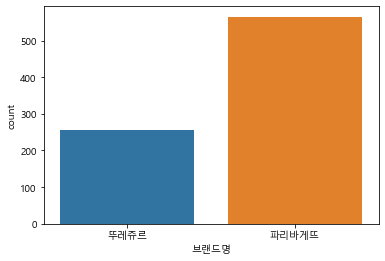

In [148]:
sns.countplot(data=df_bread, x='브랜드명')

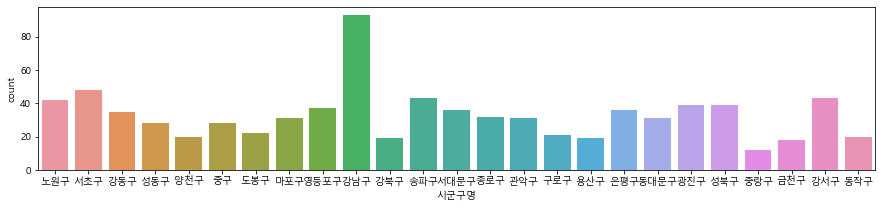

In [150]:
plt.figure(figsize=(15,3))
sns.countplot(data=df_bread, x='시군구명')

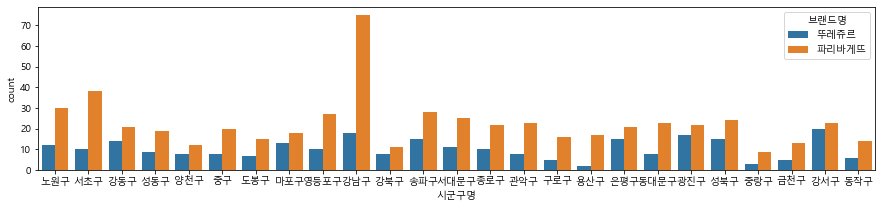

In [151]:
plt.figure(figsize=(15,3))
sns.countplot(data=df_bread, x='시군구명', hue='브랜드명')

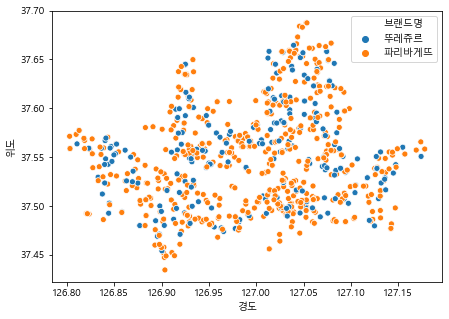

In [154]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_bread, x='경도', y='위도', hue='브랜드명')

In [155]:
m = folium.Map([lat, long], zoom_start=12)

for i in df_bread.index:
    sub_lat = df_bread.loc[i, '위도']
    sub_long = df_bread.loc[i, '경도']
    title = df_bread.loc[i, '상호명']
    
    icon_color='blue'
    if df_bread.loc[i, '브랜드명']=='뚜레쥬르':
        icon_color='green'
        
    folium.Marker([sub_lat, sub_long], color = icon_color, tooltip=title).add_to(m)
    
m

In [156]:
m = folium.Map([lat, long], zoom_start=12, tiles = 'Stamen toner')

for i in df_bread.index:
    sub_lat = df_bread.loc[i, '위도']
    sub_long = df_bread.loc[i, '경도']
    title = df_bread.loc[i, '상호명']
    
    icon_color='blue'
    if df_bread.loc[i, '브랜드명']=='뚜레쥬르':
        icon_color='green'
        
    folium.Marker([sub_lat, sub_long], color = icon_color, tooltip=title).add_to(m)
    
m

In [157]:
m = folium.Map([lat, long], zoom_start=12, tiles = 'Stamen toner')

marker_cluster = MarkerCluster().add_to(m)

for i in df_bread.index:
    sub_lat = df_bread.loc[i, '위도']
    sub_long = df_bread.loc[i, '경도']
    title = df_bread.loc[i, '상호명']
    
    icon_color='blue'
    if df_bread.loc[i, '브랜드명']=='뚜레쥬르':
        icon_color='green'
        
    folium.CircleMarker([sub_lat, sub_long], radius=3, color = icon_color, tooltip=title).add_to(marker_cluster)
    
m